# Analisis Sentimen pada Twitter Terhadap Mobil Listrik di Indonesia Menggunakan Algoritma Naive Bayes

# DATA UNDERSTANDING

##IMPORT DATA

In [1]:
#Import Modul yang diperlukan
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Dataset dari GitHub
!mkdir Data
!wget -P Data/ https://raw.githubusercontent.com/alvinhugo/SMA-SentimentAnalysis/main/moblis_baru.csv
data = pd.read_csv("https://raw.githubusercontent.com/alvinhugo/SMA-SentimentAnalysis/main/moblis_baru.csv", low_memory=False, encoding='utf8')
data.head()

mkdir: cannot create directory ‘Data’: File exists
--2024-06-28 15:26:37--  https://raw.githubusercontent.com/alvinhugo/SMA-SentimentAnalysis/main/moblis_baru.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659879 (644K) [text/plain]
Saving to: ‘Data/moblis_baru.csv.5’

moblis_baru.csv.5   100%[===================>] 644.41K  --.-KB/s    in 0.02s   

2024-06-28 15:26:37 (29.9 MB/s) - ‘Data/moblis_baru.csv.5’ saved [659879/659879]



,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,labeling
0,1785672154090209539,Wed May 01 16:29:55 +0000 2024,6,@auditams @SelebtwitMobil BYD di Amerika sana ...,1785708238312440146,NaN,auditams,in,Indonesia,0,1,0,https://twitter.com/aquasansain/status/1785708...,1276842831278075905,aquasansain,NaN
1,1785534008857870725,Wed May 01 15:46:44 +0000 2024,0,@innovacommunity semua bengkel bisa ngatasin m...,1785697370958909900,NaN,innovacommunity,in,NaN,0,0,0,https://twitter.com/octoberscale/status/178569...,2916533418,octoberscale,NaN
2,1785693360914833746,Wed May 01 15:46:43 +0000 2024,0,Sebenarnya mau marah tapi kasian pacar sendiri...,1785697366286455241,NaN,longsdragon,in,BDG VS THE WORLD,0,1,0,https://twitter.com/longsdragon/status/1785697...,1291998973700399106,longsdragon,NaN
3,1785694323453174115,Wed May 01 15:35:43 +0000 2024,0,@F_OllaJKT48 rocky km dicat pink aja eh atau g...,1785694597433512079,NaN,F_OllaJKT48,in,NaN,0,0,0,https://twitter.com/krlrsrrr/status/1785694597...,1552221432431939584,krlrsrrr,NaN
4,1785534008857870725,Wed May 01 15:18:33 +0000 2024,0,@innovacommunity takut meledak ga sih? ya semu...,1785690280022487325,NaN,innovacommunity,in,NaN,0,0,0,https://twitter.com/irohsr/status/178569028002...,1862820776,irohsr,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1917 non-null   int64  
 1   created_at               1917 non-null   object 
 2   favorite_count           1917 non-null   int64  
 3   full_text                1917 non-null   object 
 4   id_str                   1917 non-null   int64  
 5   image_url                0 non-null      float64
 6   in_reply_to_screen_name  1582 non-null   object 
 7   lang                     1917 non-null   object 
 8   location                 1087 non-null   object 
 9   quote_count              1917 non-null   int64  
 10  reply_count              1917 non-null   int64  
 11  retweet_count            1917 non-null   int64  
 12  tweet_url                1917 non-null   object 
 13  user_id_str              1917 non-null   int64  
 14  username                

##EDA

In [4]:
#Meghilangkan Dataset duplikat
data.drop_duplicates(subset="full_text", keep = 'first',  inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1916
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1906 non-null   int64  
 1   created_at               1906 non-null   object 
 2   favorite_count           1906 non-null   int64  
 3   full_text                1906 non-null   object 
 4   id_str                   1906 non-null   int64  
 5   image_url                0 non-null      float64
 6   in_reply_to_screen_name  1580 non-null   object 
 7   lang                     1906 non-null   object 
 8   location                 1080 non-null   object 
 9   quote_count              1906 non-null   int64  
 10  reply_count              1906 non-null   int64  
 11  retweet_count            1906 non-null   int64  
 12  tweet_url                1906 non-null   object 
 13  user_id_str              1906 non-null   int64  
 14  username                 1906

In [5]:
#Mengecek apakah terdapat dataset yang kosong
data['full_text'].isnull().sum()

0

In [6]:
#Visualisasi dataset yang diperlukan
df = pd.DataFrame(data['full_text'])
df.head()

,full_text
0,@auditams @SelebtwitMobil BYD di Amerika sana ...
1,@innovacommunity semua bengkel bisa ngatasin m...
2,Sebenarnya mau marah tapi kasian pacar sendiri...
3,@F_OllaJKT48 rocky km dicat pink aja eh atau g...
4,@innovacommunity takut meledak ga sih? ya semu...


# PREPROCESING

## CLEANING

Di bawah ini terdapat beberapa fungsi untuk membersihkan teks dari elemen-elemen yang tidak diinginkan seperti URL, tag HTML, emoji, username, angka, dan simbol.

In [7]:
#Import modul yang diperlukan
import re
import string
import nltk

In [8]:
def remove_URL(tweet): # Menghapus URL
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

def remove_symbols (tweet): # Menghapus simbol
  tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
  return tweet

# Visualisasi clean dataset 'full_text'
df['cleaning'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,full_text,cleaning
0,@auditams @SelebtwitMobil BYD di Amerika sana ...,BYD di Amerika sana udah ngalahin tesla kare...
1,@innovacommunity semua bengkel bisa ngatasin m...,semua bengkel bisa ngatasin mobil listrik ga ...
2,Sebenarnya mau marah tapi kasian pacar sendiri...,Sebenarnya mau marah tapi kasian pacar sendiri...
3,@F_OllaJKT48 rocky km dicat pink aja eh atau g...,rocky km dicat pink aja eh atau gak beli wuli...
4,@innovacommunity takut meledak ga sih? ya semu...,takut meledak ga sih ya semua mobil bisa tapi...
5,@innovacommunity Kalo tujuan beli mobil listri...,Kalo tujuan beli mobil listrik cuma buat meng...
6,@innovacommunity Buat apa? Mobil listrik bukan...,Buat apa Mobil listrik bukan buat jarak jauh ...
7,@innovacommunity Bengkel2 umum belum siap main...,Bengkel umum belum siap maintenance mobil lis...
8,@innovacommunity Gue akan beli mobil listrik.T...,Gue akan beli mobil listrikTapi bukan di masa...
9,@trwify Tukang parkir mobil listrik,Tukang parkir mobil listrik


## CASE FOLDING

Merupakan proses mengubah semua huruf dalam teks menjadi huruf kecil (lowercase). Tujuan dari case folding adalah untuk mengurangi variasi kata yang disebabkan oleh perbedaan penggunaan huruf besar dan kecil.

In [9]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

# Visualisasi Perbandingan dataset
df['case_folding'] = df['cleaning'].apply(case_folding)

df.head(10)

,full_text,cleaning,case_folding
0,@auditams @SelebtwitMobil BYD di Amerika sana ...,BYD di Amerika sana udah ngalahin tesla kare...,byd di amerika sana udah ngalahin tesla kare...
1,@innovacommunity semua bengkel bisa ngatasin m...,semua bengkel bisa ngatasin mobil listrik ga ...,semua bengkel bisa ngatasin mobil listrik ga ...
2,Sebenarnya mau marah tapi kasian pacar sendiri...,Sebenarnya mau marah tapi kasian pacar sendiri...,sebenarnya mau marah tapi kasian pacar sendiri...
3,@F_OllaJKT48 rocky km dicat pink aja eh atau g...,rocky km dicat pink aja eh atau gak beli wuli...,rocky km dicat pink aja eh atau gak beli wuli...
4,@innovacommunity takut meledak ga sih? ya semu...,takut meledak ga sih ya semua mobil bisa tapi...,takut meledak ga sih ya semua mobil bisa tapi...
5,@innovacommunity Kalo tujuan beli mobil listri...,Kalo tujuan beli mobil listrik cuma buat meng...,kalo tujuan beli mobil listrik cuma buat meng...
6,@innovacommunity Buat apa? Mobil listrik bukan...,Buat apa Mobil listrik bukan buat jarak jauh ...,buat apa mobil listrik bukan buat jarak jauh ...
7,@innovacommunity Bengkel2 umum belum siap main...,Bengkel umum belum siap maintenance mobil lis...,bengkel umum belum siap maintenance mobil lis...
8,@innovacommunity Gue akan beli mobil listrik.T...,Gue akan beli mobil listrikTapi bukan di masa...,gue akan beli mobil listriktapi bukan di masa...
9,@trwify Tukang parkir mobil listrik,Tukang parkir mobil listrik,tukang parkir mobil listrik


## TOKENIZATION

Merupakan proses membagi teks menjadi unit-unit yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau bahkan karakter. Tujuan dari tokenisasi adalah untuk memudahkan pemrosesan dan analisis teks dengan memecahnya menjadi bagian-bagian yang lebih terstruktur dan mudah diolah.

In [10]:
def tokenize(text):# Fungsi tokenisasi teks
     tokens = text.split()
     return tokens

# Visualisasi Perbandingan dataset
df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(10)

,full_text,cleaning,case_folding,tokenize
0,@auditams @SelebtwitMobil BYD di Amerika sana ...,BYD di Amerika sana udah ngalahin tesla kare...,byd di amerika sana udah ngalahin tesla kare...,"[byd, di, amerika, sana, udah, ngalahin, tesla..."
1,@innovacommunity semua bengkel bisa ngatasin m...,semua bengkel bisa ngatasin mobil listrik ga ...,semua bengkel bisa ngatasin mobil listrik ga ...,"[semua, bengkel, bisa, ngatasin, mobil, listri..."
2,Sebenarnya mau marah tapi kasian pacar sendiri...,Sebenarnya mau marah tapi kasian pacar sendiri...,sebenarnya mau marah tapi kasian pacar sendiri...,"[sebenarnya, mau, marah, tapi, kasian, pacar, ..."
3,@F_OllaJKT48 rocky km dicat pink aja eh atau g...,rocky km dicat pink aja eh atau gak beli wuli...,rocky km dicat pink aja eh atau gak beli wuli...,"[rocky, km, dicat, pink, aja, eh, atau, gak, b..."
4,@innovacommunity takut meledak ga sih? ya semu...,takut meledak ga sih ya semua mobil bisa tapi...,takut meledak ga sih ya semua mobil bisa tapi...,"[takut, meledak, ga, sih, ya, semua, mobil, bi..."
5,@innovacommunity Kalo tujuan beli mobil listri...,Kalo tujuan beli mobil listrik cuma buat meng...,kalo tujuan beli mobil listrik cuma buat meng...,"[kalo, tujuan, beli, mobil, listrik, cuma, bua..."
6,@innovacommunity Buat apa? Mobil listrik bukan...,Buat apa Mobil listrik bukan buat jarak jauh ...,buat apa mobil listrik bukan buat jarak jauh ...,"[buat, apa, mobil, listrik, bukan, buat, jarak..."
7,@innovacommunity Bengkel2 umum belum siap main...,Bengkel umum belum siap maintenance mobil lis...,bengkel umum belum siap maintenance mobil lis...,"[bengkel, umum, belum, siap, maintenance, mobi..."
8,@innovacommunity Gue akan beli mobil listrik.T...,Gue akan beli mobil listrikTapi bukan di masa...,gue akan beli mobil listriktapi bukan di masa...,"[gue, akan, beli, mobil, listriktapi, bukan, d..."
9,@trwify Tukang parkir mobil listrik,Tukang parkir mobil listrik,tukang parkir mobil listrik,"[tukang, parkir, mobil, listrik]"


## STOPWORD REMOVAL

Merupakan proses untuk menghapus kata-kata umum yang tidak memiliki banyak makna dalam analisis teks. Stopword adalah kata-kata yang sering muncul dalam teks tetapi biasanya tidak berkontribusi signifikan terhadap pemahaman atau analisis konteks. Contoh stopword dalam bahasa Indonesia termasuk kata seperti "dan", "yang", "adalah", "di", "ke", "dari", dan sebagainya.

In [11]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://github.com/alvinhugo/SMA-SentimentAnalysis/raw/main/stopwords-id-mobil-listrik.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Visualisasi perbandingan dataset
df['stopword_removal'] = df['tokenize'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text,cleaning,case_folding,tokenize,stopword_removal
0,@auditams @SelebtwitMobil BYD di Amerika sana ...,BYD di Amerika sana udah ngalahin tesla kare...,byd di amerika sana udah ngalahin tesla kare...,"[byd, di, amerika, sana, udah, ngalahin, tesla...","[ngalahin, sebagus, merk, opsi, terbaik, harga..."
1,@innovacommunity semua bengkel bisa ngatasin m...,semua bengkel bisa ngatasin mobil listrik ga ...,semua bengkel bisa ngatasin mobil listrik ga ...,"[semua, bengkel, bisa, ngatasin, mobil, listri...","[bengkel, ngatasin, bengkel, resminya]"
2,Sebenarnya mau marah tapi kasian pacar sendiri...,Sebenarnya mau marah tapi kasian pacar sendiri...,sebenarnya mau marah tapi kasian pacar sendiri...,"[sebenarnya, mau, marah, tapi, kasian, pacar, ...","[marah, kasian, pacar, emosionalnya, terguncan..."
3,@F_OllaJKT48 rocky km dicat pink aja eh atau g...,rocky km dicat pink aja eh atau gak beli wuli...,rocky km dicat pink aja eh atau gak beli wuli...,"[rocky, km, dicat, pink, aja, eh, atau, gak, b...","[rocky, dicat, pink, warna, pinkkkk]"
4,@innovacommunity takut meledak ga sih? ya semu...,takut meledak ga sih ya semua mobil bisa tapi...,takut meledak ga sih ya semua mobil bisa tapi...,"[takut, meledak, ga, sih, ya, semua, mobil, bi...","[takut, meledak, resikonya, gabisa, orthn, ked..."


## STEMMING

Merupakan proses mengubah kata-kata dalam teks menjadi bentuk dasarnya (root form). Tujuan dari stemming adalah untuk mengurangi variasi kata yang berasal dari perubahan bentuk kata yang berbeda (misalnya, perubahan bentuk kata kerja atau kata benda) sehingga kata-kata dengan makna yang sama dapat dianggap sebagai entitas yang sama. Misalnya, kata-kata "berlari", "berlari-lari", "lari", dan "pelari" semuanya dapat direduksi menjadi bentuk dasar "lari".


In [13]:
# Install dan Import modul yang diperlukan
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [14]:
factory = StemmerFactory()           # Membuat instance dari StemmerFactory
stemmer = factory.create_stemmer()   # Membuat instance stemmer menggunakan factory

def stem_text(text): # Mendefinisikan fungsi stem_text untuk melakukan stemming pada teks input
    return [stemmer.stem(word) for word in text]

In [15]:
# Visualisasi perbandingan dataset
df['stemming'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(10)

,full_text,cleaning,case_folding,tokenize,stopword_removal,stemming
0,@auditams @SelebtwitMobil BYD di Amerika sana ...,BYD di Amerika sana udah ngalahin tesla kare...,byd di amerika sana udah ngalahin tesla kare...,"[byd, di, amerika, sana, udah, ngalahin, tesla...","[ngalahin, sebagus, merk, opsi, terbaik, harga...",ngalahin bagus merk opsi baik harga resmi fitu...
1,@innovacommunity semua bengkel bisa ngatasin m...,semua bengkel bisa ngatasin mobil listrik ga ...,semua bengkel bisa ngatasin mobil listrik ga ...,"[semua, bengkel, bisa, ngatasin, mobil, listri...","[bengkel, ngatasin, bengkel, resminya]",bengkel ngatasin bengkel resmi
2,Sebenarnya mau marah tapi kasian pacar sendiri...,Sebenarnya mau marah tapi kasian pacar sendiri...,sebenarnya mau marah tapi kasian pacar sendiri...,"[sebenarnya, mau, marah, tapi, kasian, pacar, ...","[marah, kasian, pacar, emosionalnya, terguncan...",marah kasi pacar emosional guncang ujungujungn...
3,@F_OllaJKT48 rocky km dicat pink aja eh atau g...,rocky km dicat pink aja eh atau gak beli wuli...,rocky km dicat pink aja eh atau gak beli wuli...,"[rocky, km, dicat, pink, aja, eh, atau, gak, b...","[rocky, dicat, pink, warna, pinkkkk]",rocky cat pink warna pinkkkk
4,@innovacommunity takut meledak ga sih? ya semu...,takut meledak ga sih ya semua mobil bisa tapi...,takut meledak ga sih ya semua mobil bisa tapi...,"[takut, meledak, ga, sih, ya, semua, mobil, bi...","[takut, meledak, resikonya, gabisa, orthn, ked...",takut ledak resiko gabisa orthn depan update h...
5,@innovacommunity Kalo tujuan beli mobil listri...,Kalo tujuan beli mobil listrik cuma buat meng...,kalo tujuan beli mobil listrik cuma buat meng...,"[kalo, tujuan, beli, mobil, listrik, cuma, bua...","[tujuan, mengakali, ganjilgenap, setahun, habi...",tuju akal ganjilgenap tahun habis awat
6,@innovacommunity Buat apa? Mobil listrik bukan...,Buat apa Mobil listrik bukan buat jarak jauh ...,buat apa mobil listrik bukan buat jarak jauh ...,"[buat, apa, mobil, listrik, bukan, buat, jarak...","[jarak, ngisi, batere, rusak, biaya, perbaikan...",jarak ngisi batere rusak biaya baik mahal muda...
7,@innovacommunity Bengkel2 umum belum siap main...,Bengkel umum belum siap maintenance mobil lis...,bengkel umum belum siap maintenance mobil lis...,"[bengkel, umum, belum, siap, maintenance, mobi...","[bengkel, maintenance, perbaikan, bengkel, res...",bengkel maintenance baik bengkel resmi garansi...
8,@innovacommunity Gue akan beli mobil listrik.T...,Gue akan beli mobil listrikTapi bukan di masa...,gue akan beli mobil listriktapi bukan di masa...,"[gue, akan, beli, mobil, listriktapi, bukan, d...","[listriktapi, tunggu, bbrpa, sepraktis, sereli...",listriktapi tunggu bbrpa praktis reliabel
9,@trwify Tukang parkir mobil listrik,Tukang parkir mobil listrik,tukang parkir mobil listrik,"[tukang, parkir, mobil, listrik]",[tukang],tukang


## SAVE DATA TO CSV

In [17]:
df.to_csv('Hasil-Preprocesing-Moblis(2).csv',encoding='utf8',index=False)

# Data Visualization

In [18]:
# Import modul yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist
import nltk
nltk.download('punkt')
from nltk.util import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
# Import dataset yang sudah di-labelling
# Note :
# Negatif = 0
# Netral  = 1
# Positif = 2

!mkdir Data
!wget -P Data/ https://raw.githubusercontent.com/alvinhugo/SMA-SentimentAnalysis/main/Hasil-Labelling-Moblis.csv
df_label = pd.read_csv("https://raw.githubusercontent.com/alvinhugo/SMA-SentimentAnalysis/main/Hasil-Labelling-Moblis.csv", low_memory=False, encoding='utf8')
df_label.head()

mkdir: cannot create directory ‘Data’: File exists
--2024-06-28 16:52:39--  https://raw.githubusercontent.com/alvinhugo/SMA-SentimentAnalysis/main/Hasil-Labelling-Moblis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1474198 (1.4M) [text/plain]
Saving to: ‘Data/Hasil-Labelling-Moblis.csv’

Hasil-Labelling-Mob 100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2024-06-28 16:52:40 (54.4 MB/s) - ‘Data/Hasil-Labelling-Moblis.csv’ saved [1474198/1474198]



,sentiment,full_text,cleaning,case_folding,tokenize,stopword_removal,stemming
0,2,@auditams @SelebtwitMobil BYD di Amerika sana ...,BYD di Amerika sana udah ngalahin tesla karena...,byd di amerika sana udah ngalahin tesla karena...,"['byd', 'di', 'amerika', 'sana', 'udah', 'ngal...","['ngalahin', 'sebagus', 'merk', 'opsi', 'terba...",ngalahin bagus merk opsi baik harga resmi fitu...
1,1,@innovacommunity semua bengkel bisa ngatasin m...,semua bengkel bisa ngatasin mobil listrik ga a...,semua bengkel bisa ngatasin mobil listrik ga a...,"['semua', 'bengkel', 'bisa', 'ngatasin', 'mobi...","['bengkel', 'ngatasin', 'bengkel', 'resminya']",bengkel ngatasin bengkel resmi
2,1,Sebenarnya mau marah tapi kasian pacar sendiri...,Sebenarnya mau marah tapi kasian pacar sendiri...,sebenarnya mau marah tapi kasian pacar sendiri...,"['sebenarnya', 'mau', 'marah', 'tapi', 'kasian...","['marah', 'kasian', 'pacar', 'emosionalnya', '...",marah kasi pacar emosional guncang ujungujungn...
3,1,@F_OllaJKT48 rocky km dicat pink aja eh atau g...,rocky km dicat pink aja eh atau gak beli wulin...,rocky km dicat pink aja eh atau gak beli wulin...,"['rocky', 'km', 'dicat', 'pink', 'aja', 'eh', ...","['rocky', 'dicat', 'pink', 'warna', 'pinkkkk']",rocky cat pink warna pinkkkk
4,0,@innovacommunity takut meledak ga sih? ya semu...,takut meledak ga sih ya semua mobil bisa tapi ...,takut meledak ga sih ya semua mobil bisa tapi ...,"['takut', 'meledak', 'ga', 'sih', 'ya', 'semua...","['takut', 'meledak', 'resikonya', 'gabisa', 'o...",takut ledak resiko gabisa orthn depan update h...


## Sentiment Analysis

<ipython-input-20-d7f716376c30>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_count, netral_count, positif_count], palette='pastel')


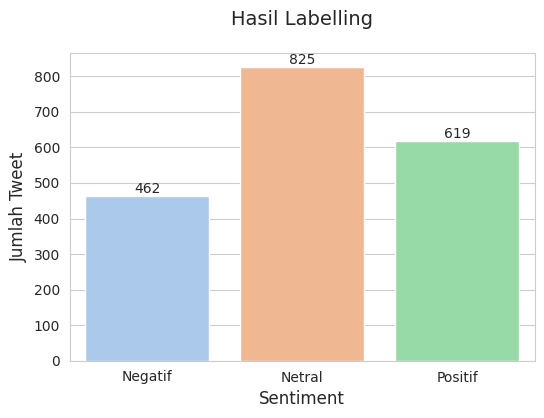

In [20]:
# Membuat DataFrame baru untuk data sentiment negatif (nilai 0)
negatif_df = df_label[df_label['sentiment'] == 0]

# Membuat DataFrame baru untuk data sentiment netral (nilai 1)
netral_df = df_label[df_label['sentiment'] == 1]

# Membuat DataFrame baru untuk data sentiment positif (nilai 2)
positif_df = df_label[df_label['sentiment'] == 2]

# Hitung jumlah data sentiment negatif dan positif
negatif_count = negatif_df.shape[0]
netral_count = netral_df.shape[0]
positif_count = positif_df.shape[0]

# Plot barplot untuk jumlah data sentiment negatif dan positif
sns.set_style('whitegrid')

# Visualisasi Persebaran Sentimen
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_count, netral_count, positif_count], palette='pastel')
plt.title('Hasil Labelling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate([negatif_count, netral_count,positif_count]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

Sentimen masyarakat Indonesia terhadap mobil listrik di Twitter didominasi oleh tweet yang berupa pertanyaan atau pernyataan umum tentang mobil listrik, sehingga sentimen netral lebih banyak dibandingkan dengan sentimen lainnya. Meskipun demikian, terdapat juga sejumlah sentimen positif yang signifikan, bahkan lebih besar dibandingkan dengan sentimen negatif di kalangan masyarakat mengenai mobil listrik di Indonesia.



## WordCloud

In [21]:
# Buat DataFrame baru untuk label positif dan negatif
df_negatif = df_label[df_label['sentiment'] == 0]
df_positif = df_label[df_label['sentiment'] == 2]

### Positive

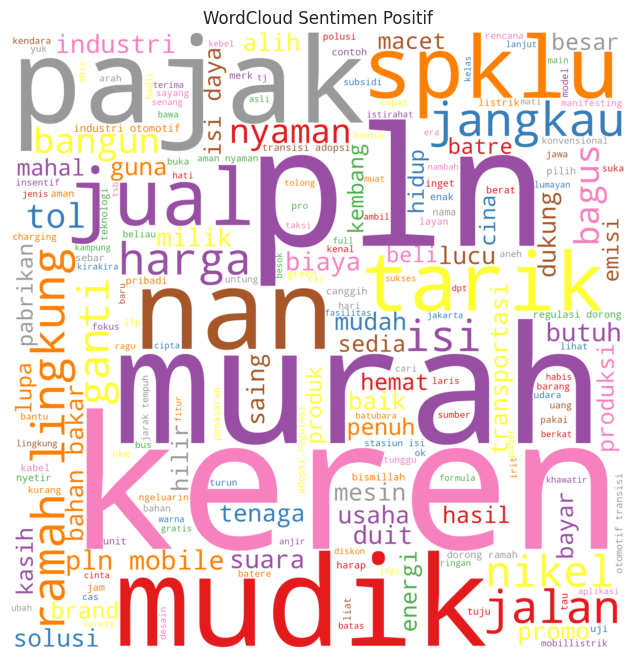

In [22]:
# Gabungkan semua teks dari kolom 'stemming' dalam DataFrame df_positif
all_text_s2 = ' '.join(word for word in df_positif['stemming'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_s2)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

### Negative

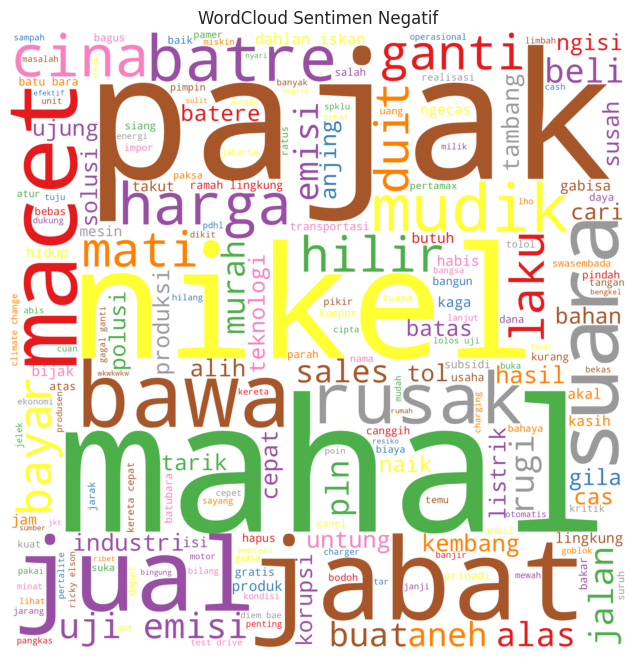

In [23]:
# Gabungkan semua teks dari kolom 'stemming' dalam DataFrame df_negatif
all_text_s0 = ' '.join(word for word in df_negatif['stemming'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_s0)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

# Naive Bayes Algorithm

In [24]:
#Import modul yang diperlukan
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## Oversampling

Dilakukan Oversampling dikarenakan untuk menyeimbangkan jumlah data dalam setiap kelas sentimen (Negatif, Netral, Positif) sehingga model yang dilatih tidak bias terhadap kelas tertentu yang memiliki lebih banyak data.

In [27]:
# Membuat DataFrame baru untuk data sentiment negatif (nilai 0)
negatif_df = df_label[df_label['sentiment'] == 0]

# Membuat DataFrame baru untuk data sentiment netral (nilai 1)
netral_df = df_label[df_label['sentiment'] == 1]

# Membuat DataFrame baru untuk data sentiment positif (nilai 2)
positif_df = df_label[df_label['sentiment'] == 2]

# Hitung jumlah data sentiment netral
netral_count = netral_df.shape[0]

# Lakukan oversampling pada data negatif dan positif
negatif_oversampled = resample(negatif_df, replace=True, n_samples=netral_count, random_state=42)
positif_oversampled = resample(positif_df, replace=True, n_samples=netral_count, random_state=42)

# Gabungkan kembali data yang telah diresample
df_balanced = pd.concat([netral_df, negatif_oversampled, positif_oversampled])

## Modeling

In [28]:
# Pisah data train dan test
x = df_balanced['stemming'].fillna('')
y = df_balanced['sentiment'].fillna('')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Latih model Naive Bayes menggunakan fitur TF-IDF
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vec, y_train)

# Prediksi dan evaluasi model
y_pred = naive_bayes.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])

<ipython-input-29-92223576ceaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')


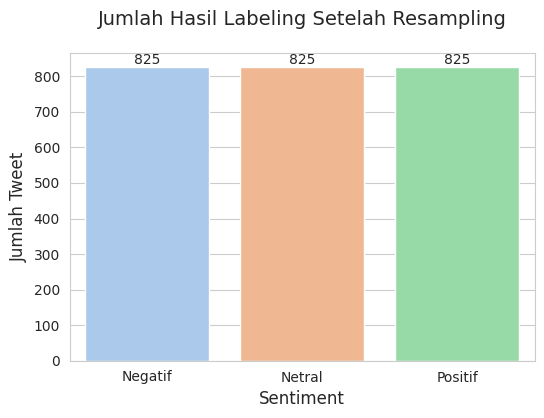

Akurasi Model Naive Bayes:  0.7446236559139785

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.75      0.84      0.80       134
      Netral       0.78      0.52      0.62       120
     Positif       0.72      0.86      0.78       118

    accuracy                           0.74       372
   macro avg       0.75      0.74      0.73       372
weighted avg       0.75      0.74      0.74       372



In [29]:
# Plot barplot untuk jumlah data sentiment yang baru (oversampling)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')
plt.title('Jumlah Hasil Labeling Setelah Resampling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate([negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

# Evaluasi Model
print("Akurasi Model Naive Bayes: ", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)

Setelah dilakukan Oversampling, semua sentimen bernilai sama, yaitu sebesar sentimen netral karena sentimen tersebut paling besar.

Untuk akurasi model Naive Bayes untuk menganalisi didapat sekitar 74.6%.

Kelebihan model ini adalah mampu mendeteksi sentimen positif dengan sangat baik dikarenakan nilai recall nya paling besar.

Kekurangan model ini adalah banyak melewatkan data tweet netral dikarenakan nilai recall yang lebih kecil dibandingkan nilai recall sentimen lainnya.

## Save Model

In [30]:
# Simpan model dan vectorizer
import joblib
joblib.dump(naive_bayes, 'naive_bayes_model_moblis.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer_moblis.pkl')
print('Model Saved')

Model Saved
